Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs(R), At Bats(AB), Hits(H), Doubles(2B), Triples(3B), Homeruns(HR), Walks(BB), Strikeouts(SO), Stolen Bases(SB), Runs Allowed(RA), Earned Runs(ER), Earned Run Average (ERA), Shutouts(SHO), Saves(SV), Complete Games(CG) and Errors(E)


-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNetCV


from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore
from scipy import stats

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [41]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [42]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


the target column (number of wins) is numerical column and it is a regression problem

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All features are numerical and it is a regression problem.

No missing data in any feature

In [44]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [45]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [46]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

## checking for outliers

In [47]:
zScores=np.abs(zscore(df))
zScores

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [48]:
filteredEntries=(zScores<3).all(axis=1)
filteredEntries

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [49]:
np.sum(filteredEntries)

29

In [50]:
((1)/30)*100

3.3333333333333335

only 3% data is outliers so removing them

In [51]:
df=df[filteredEntries]


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       29 non-null     int64  
 1   R       29 non-null     int64  
 2   AB      29 non-null     int64  
 3   H       29 non-null     int64  
 4   2B      29 non-null     int64  
 5   3B      29 non-null     int64  
 6   HR      29 non-null     int64  
 7   BB      29 non-null     int64  
 8   SO      29 non-null     int64  
 9   SB      29 non-null     int64  
 10  RA      29 non-null     int64  
 11  ER      29 non-null     int64  
 12  ERA     29 non-null     float64
 13  CG      29 non-null     int64  
 14  SHO     29 non-null     int64  
 15  SV      29 non-null     int64  
 16  E       29 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


## EDA

-- Input features: Runs(R), At Bats(AB), Hits(H), Doubles(2B), Triples(3B), Homeruns(HR), Walks(BB), Strikeouts(SO), Stolen Bases(SB), Runs Allowed(RA), Earned Runs(ER), Earned Run Average (ERA), Shutouts(SHO), Saves(SV), Complete Games(CG) and Errors(E)



In [53]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:xlabel='R', ylabel='Density'>

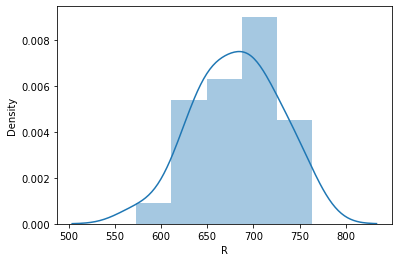

In [54]:
sns.distplot(df['R'])

number of runs are more in the range 690 to 710
and it is very less skewed

<AxesSubplot:xlabel='AB', ylabel='Density'>

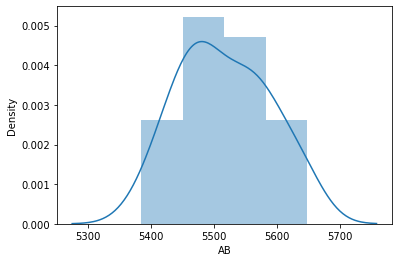

In [55]:
sns.distplot(df['AB'])

'AB' has very less skewness

<AxesSubplot:xlabel='H', ylabel='Density'>

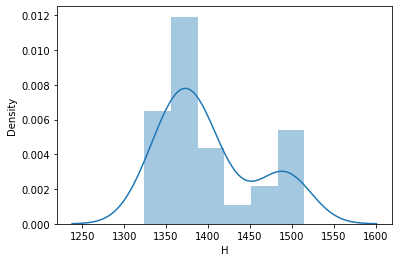

In [56]:
sns.distplot(df['H'])

<AxesSubplot:xlabel='R', ylabel='W'>

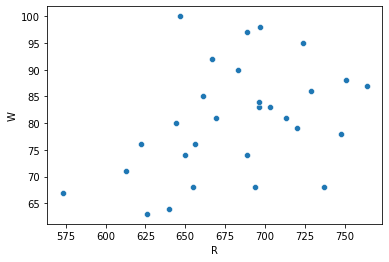

In [58]:
sns.scatterplot(data=df,x='R',y='W')

As the Runs is increasing Wins is also increasing


-- Input features: Runs(R), At Bats(AB), Hits(H), Doubles(2B), Triples(3B), Homeruns(HR), Walks(BB), Strikeouts(SO), Stolen Bases(SB), Runs Allowed(RA), Earned Runs(ER), Earned Run Average (ERA), Shutouts(SHO), Saves(SV), Complete Games(CG) and Errors(E)


-- Output: Number of predicted wins (W)

<AxesSubplot:xlabel='H', ylabel='W'>

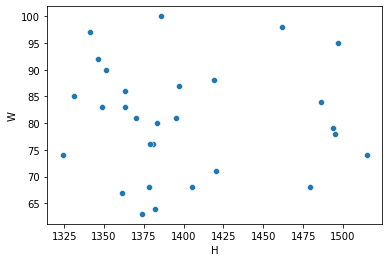

In [59]:
sns.scatterplot(data=df,x='H',y='W')

Hits is randomly dispersed and no relation to Wins like even more hits have less wins and high wins.

<AxesSubplot:xlabel='2B', ylabel='W'>

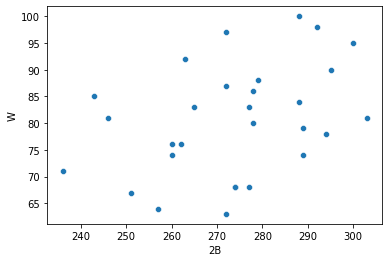

In [60]:
sns.scatterplot(data=df,x='2B',y='W')

As the Doubles(2B) is increasing Wins is also increasing

<AxesSubplot:xlabel='3B', ylabel='W'>

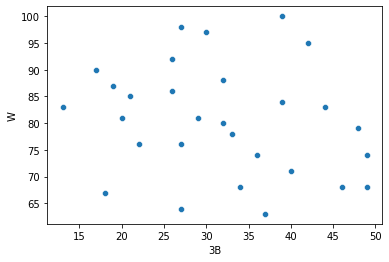

In [61]:
sns.scatterplot(data=df,x='3B',y='W')

the TRIPLES (3B) is  randomly dispersed and more tripes have less and more wins

<AxesSubplot:xlabel='SO', ylabel='W'>

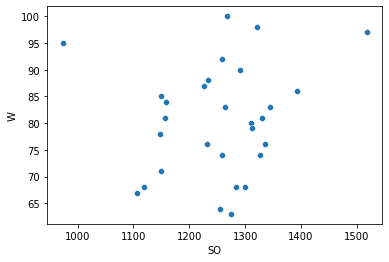

In [62]:
sns.scatterplot(data=df,x='SO',y='W')


as the STRIKE OUTS (SO)  increases WINS increase
ant these is one case with less strike outs and more wins

<AxesSubplot:xlabel='ER', ylabel='W'>

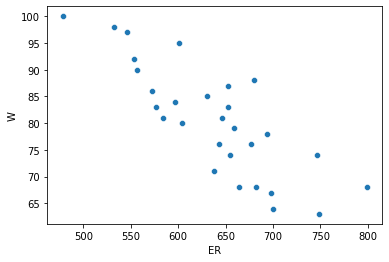

In [63]:
sns.scatterplot(data=df,x='ER',y='W')


as the earned runs is increasing number of wins is decreasing

<AxesSubplot:xlabel='CG', ylabel='W'>

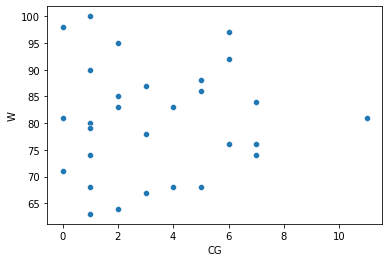

In [64]:
sns.scatterplot(data=df,x='CG',y='W')


CG is randomly dispersed

<AxesSubplot:xlabel='E', ylabel='W'>

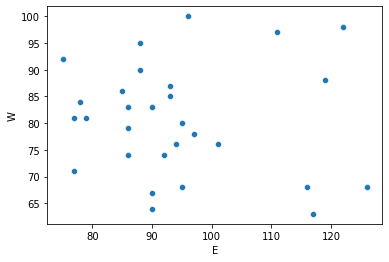

In [65]:
sns.scatterplot(data=df,x='E',y='W')


ERRORS is randomly dispersed and more errors also have less wins and more wins

## removing skewness


In [66]:
df.columns


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [68]:
for column in df.columns[1:]:
    print(column , df[column].skew())

R -0.21536363420992782
AB 0.16957316834729352
H 0.7837722117274881
2B -0.335303936110201
3B 0.09012434653848651
HR 0.45086158125803544
BB 0.15119282971519954
SO -0.2338149185462262
SB 0.4949657663368456
RA 0.018155177145956613
ER 0.018460990156758887
ERA 0.016693217783651695
CG 0.8549795901105167
SHO 0.5269430585305683
SV 0.6274804879503074
E 0.8402711976867623


Hits(H), CG complete Games, shutouts(SHO), Saves(SV), Errors(E) has more skewness than 0.5


In [69]:
moreSkew=['H','CG','SHO','SV','E']

In [70]:
def min_skewness(colu):
    min_Skew=np.abs(df[colu].skew())
    print("initial",min_Skew)
    
    box_col_Skew=10
    min_SkewType=""
    log_col=np.log(df[colu])
    sqrt_col=np.sqrt(df[colu])
    try:
        box_col=stats.boxcox(df[colu])[0]
        box_col_Skew=np.abs(pd.Series(box_col).skew())
        print(box_col_Skew)

    except ValueError:
        print("hi")
    
    log_col_Skew=np.abs(log_col.skew())
    sqrt_col_Skew=np.abs(sqrt_col.skew())
    
    print(log_col_Skew)
    print(sqrt_col_Skew)
    
    if log_col_Skew<min_Skew:
        min_SkewType="log"
        min_Skew=log_col_Skew
    if sqrt_col_Skew<min_Skew:
        min_SkewType="sqrt"
        min_Skew=sqrt_col_Skew
    if box_col_Skew<min_Skew:
        min_SkewType="box"
        min_Skew=box_col_Skew
    print(min_Skew)
    print(column,"=",min_SkewType)
        

In [71]:
for column in moreSkew:
    print(column)
    min_skewness(column)
    print("="*20)

H
initial 0.7837722117274881
0
0.7384225982580486
0.7612737602321705
0
H = box
CG
initial 0.8549795901105167
hi
nan
0.2606778075812151
0.2606778075812151
CG = sqrt
SHO
initial 0.5269430585305683
0.0002009371832077133
0.7261238398670306
0.08580249517743828
0.0002009371832077133
SHO = box
SV
initial 0.6274804879503074
0.000856635183764085
0.09675174266622452
0.37027995254293594
0.000856635183764085
SV = box
E
initial 0.8402711976867623
0.06514996960967177
0.5833075389348484
0.7149657245319976
0.06514996960967177
E = box



FOR Hits(H), shutouts(SHO), Saves(SV), Errors(E) 
based on the above output apply the Boxcox transformation as they give minimum skew.

For Complete Games(CG) apply the sqrt transformation

In [72]:
box=['H','SHO','SV','E']
sqrt=['CG']


In [73]:
df['H']= stats.boxcox(df['H'])[0]
df['SHO']=stats.boxcox(df['SHO'])[0]
df['SV']=stats.boxcox(df['SV'])[0]
df['E']=stats.boxcox(df['E'])[0]

In [74]:
df['CG']=np.sqrt(df['CG'])


In [75]:
for column in df.columns[1:]:
    print(column , df[column].skew())

R -0.21536363420992782
AB 0.16957316834729352
H 0
2B -0.335303936110201
3B 0.09012434653848651
HR 0.45086158125803544
BB 0.15119282971519954
SO -0.2338149185462262
SB 0.4949657663368456
RA 0.018155177145956613
ER 0.018460990156758887
ERA 0.016693217783651695
CG -0.2606778075812151
SHO -0.0002009371832077133
SV -0.000856635183764085
E 0.06514996960967177


Now all features are having very less skew(between -0.5 and +0.5)

In [77]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,0.092247,300,42,139,383,973,104,641,601,3.73,1.414214,3.974599,2.908497,0.546961
1,83,696,5467,0.092247,277,44,156,439,1264,70,700,653,4.07,1.414214,5.459561,2.796661,0.546955
2,81,669,5439,0.092247,303,29,141,533,1157,86,640,584,3.67,3.316625,4.749412,2.707279,0.546928
3,76,622,5533,0.092247,260,27,136,404,1231,68,701,643,3.98,2.645751,4.371328,2.692943,0.546995
4,74,689,5605,0.092247,289,49,151,455,1259,83,803,746,4.64,2.645751,5.459561,2.662860,0.546955


In [78]:
y=df['W']
X=df.drop('W',axis=1)

## identifying the best random state

In [83]:
minRMSE="null"
minRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    if(minRMSE=="null" or RMSE<minRMSE):
        minRMSE=RMSE
        minRS=i
        
print("min RMSE is",minRMSE,"on random state",minRS)

min RMSE is 2.2220437861078275 on random state 181


min RMSE is 2.2220437861078275 on random state 181


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=181)


## Scaling

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [87]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [88]:
x_train_scale=scaler.fit_transform(X_train)


In [89]:
X_train.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [90]:
XtrainDF=pd.DataFrame(x_train_scale,columns=X_train.columns)
XtrainDF

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.320607,1.367273,1.0,0.922469,1.509112,-0.103088,-0.044946,0.126300,0.002166,1.535962,1.517452,1.429584,1.167579,0.160997,-1.087842,-0.508660
1,1.055631,1.983886,1.0,0.922469,1.409658,0.017473,0.578872,0.622945,2.443035,0.337981,0.323890,0.169797,-0.654722,0.160997,0.167742,-0.508660
2,-1.267994,0.358269,1.0,-0.735986,-0.678884,-0.705890,-0.953937,-0.136078,-0.745039,0.178250,0.104384,0.043819,1.167579,-0.584358,-0.778408,0.566438
3,-0.485549,-0.384469,1.0,0.064647,0.017296,-0.344209,-0.811350,0.501126,0.051979,0.657443,0.639429,0.673712,-0.654722,-1.142949,-0.349223,1.270187
4,-1.481388,-0.622706,1.0,-2.108500,0.614023,-1.348880,-1.470814,-0.895101,1.446762,-0.127900,0.035789,0.127804,-1.761999,0.160997,-1.087842,-1.454074
5,0.652553,-1.113194,1.0,-0.450046,-2.071246,0.941770,1.452216,0.922806,-1.292989,-0.700269,-0.801076,-0.712054,0.452554,0.390966,-0.214479,-0.171981
6,0.320607,-0.230316,1.0,-0.049729,-0.380521,0.700649,1.951270,2.553299,0.599930,-1.059663,-1.226368,-1.257961,0.950264,2.010943,0.632382,1.065262
7,1.150473,0.946855,1.0,1.551538,0.812932,-0.585330,-1.328227,-2.553707,1.048253,-0.620404,-0.471818,-0.481093,-0.196073,-0.856087,1.438736,-0.334912
8,-0.201023,-1.715793,1.0,-0.564422,-0.778339,1.343638,1.879976,0.116929,-1.193362,-1.232705,-1.130335,-1.089990,0.950264,2.010943,0.520591,-1.708733
9,1.790655,0.049963,1.0,0.350588,-0.181612,0.740835,0.810575,-0.117337,0.898812,0.604199,0.611991,0.589726,0.713947,-0.584358,0.288411,1.381606


In [91]:
x_test_scale=scaler.transform(X_test)
x_test_scale

array([[ 2.098891  ,  0.83474319,  1.        , -0.04972879, -1.47451963,
         2.34830857,  1.71956614, -0.17356079, -0.99410749,  0.1383176 ,
         0.22785639,  0.14880094,  0.15586037, -2.13431029,  0.63238186,
         0.0540592 ],
       [-0.46183849,  0.51242265,  1.        , -0.62160982, -1.17615642,
         1.78569298,  0.36499128,  0.84784038, -0.6952255 ,  0.51102275,
         0.57083394,  0.4217548 ,  0.95026359,  0.16099748,  0.28841082,
         0.12490626],
       [ 1.26902496, -0.67876198,  1.        ,  0.29339983, -0.77833881,
         3.07167148,  0.50757811,  1.37259695,  1.89508508, -0.92655428,
        -0.86967178, -0.81703582,  0.7139467 ,  0.39096639, -0.48797174,
        -0.59989752],
       [ 1.71952367,  1.85776058,  1.        ,  1.20840948, -0.08215799,
         0.29878033,  0.36499128, -0.91384237, -0.59559817,  0.87041701,
         0.80405868,  0.73670157,  0.15586037, -0.32540003, -0.34922287,
         0.32517897],
       [-0.84120582,  0.89079894,  1

In [92]:
XtestDF=pd.DataFrame(x_test_scale,columns=X_train.columns)
XtestDF

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,2.098891,0.834743,1.0,-0.049729,-1.474520,2.348309,1.719566,-0.173561,-0.994107,0.138318,0.227856,0.148801,0.155860,-2.134310,0.632382,0.054059
1,-0.461838,0.512423,1.0,-0.621610,-1.176156,1.785693,0.364991,0.847840,-0.695225,0.511023,0.570834,0.421755,0.950264,0.160997,0.288411,0.124906
2,1.269025,-0.678762,1.0,0.293400,-0.778339,3.071671,0.507578,1.372597,1.895085,-0.926554,-0.869672,-0.817036,0.713947,0.390966,-0.487972,-0.599898
3,1.719524,1.857761,1.0,1.208409,-0.082158,0.298780,0.364991,-0.913842,-0.595598,0.870417,0.804059,0.736702,0.155860,-0.325400,-0.349223,0.325179
4,-0.841206,0.890799,1.0,-0.907550,-0.678884,0.539901,0.685812,0.088817,2.542663,0.883728,0.886373,0.778694,-0.196073,-0.856087,-1.087842,-0.171981
5,0.178344,0.274186,1.0,1.265598,-1.673428,0.941770,0.543225,0.416790,-1.591871,-0.993109,-1.075458,-1.110986,-0.654722,0.613407,0.847996,-0.334912


In [93]:
lr=LinearRegression()
lr.fit(XtrainDF,y_train)
pred=lr.predict(XtestDF)

lrR2=r2_score(y_test, pred)
lrR2

0.9357145645042727

In [94]:
lrRMSE=np.sqrt(mean_squared_error(y_test,pred))
lrRMSE

2.2220437861077733

In [95]:
svr=SVR()
svr.fit(XtrainDF,y_train)
pred=svr.predict(XtestDF)
svrR2=r2_score(y_test, pred)
svrR2

0.2209633011802239

In [96]:
svrRMSE=np.sqrt(mean_squared_error(y_test,pred))
svrRMSE

7.73526641112114

In [97]:
sgd=SGDRegressor()
sgd.fit(XtrainDF,y_train)
pred=sgd.predict(XtestDF)
sgdR2=r2_score(y_test, pred)
sgdR2

0.9365490179718594

In [98]:
sgdRMSE=np.sqrt(mean_squared_error(y_test,pred))
sgdRMSE

2.207575123346181

In [99]:
knnR=KNeighborsRegressor()
knnR.fit(XtrainDF,y_train)
pred=knnR.predict(XtestDF)
knnR2=r2_score(y_test, pred)
knnR2

0.672679927667269

In [100]:
knnrRMSE=np.sqrt(mean_squared_error(y_test,pred))
knnrRMSE

5.013980454688673

## frinding cross val score for each model

In [102]:
from sklearn.pipeline import Pipeline

In [104]:

operations = [('scaler',StandardScaler()),('lr',lr)]
pipe=Pipeline(operations)
lrCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
lrCV


0.16978527132612897

In [107]:
operations = [('scaler',StandardScaler()),('svr',SVR())]
pipe=Pipeline(operations)
svrCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
svrCV

-0.28704042661127904

svr has a negative R2 which means it fits the data very poorly

In [108]:
operations = [('scaler',StandardScaler()),('sgd',sgd)]
pipe=Pipeline(operations)
sgdCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
sgdCV


0.3813992046622414

In [109]:
operations = [('scaler',StandardScaler()),('KNNR',knnR)]
pipe=Pipeline(operations)
knnrCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
knnrCV

0.1836658001223845

In [110]:
def rmseValue(model,indepen,depend):
    y_pred=model.predict(indepen)
    return np.sqrt(mean_squared_error(y_pred,depend))


operations = [('scaler',StandardScaler()),('lr',lr)]
pipe=Pipeline(operations)
lrCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()

operations = [('scaler',StandardScaler()),('svr',SVR())]
pipe=Pipeline(operations)
svrCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()

operations = [('scaler',StandardScaler()),('sgd',sgd)]
pipe=Pipeline(operations)
sgdCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()


operations = [('scaler',StandardScaler()),('KNNR',knnR)]
pipe=Pipeline(operations)
knnrCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()


### Comparing r2 scores for normal model and cross val score

In [111]:
print(lrR2-lrCV)
print(svrR2-svrCV)
print(sgdR2-sgdCV)
print(knnR2-knnrCV)

0.7659292931781437
0.5080037277915029
0.555149813309618
0.4890141275448845


#### K nearest neighbour is the best method, as the difference between r2Score for cross val score and normal model r2Score is less (0.4890141275448845)

In [113]:
print(lrRMSE-lrCV1)
print(svrRMSE-svrCV1)
print(sgdRMSE-sgdCV1)
print(knnrRMSE-knnrCV1)

-4.743026773285608
-1.4275051618813652
-2.79091498599838
-1.60804885774278


## Hyper Parameter Tuning using a pipeline

In [114]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



In [116]:

scaler=StandardScaler()

In [120]:
operations = [('scaler',StandardScaler()),('knnR',KNeighborsRegressor())]

In [122]:
pipe = Pipeline(operations)

In [123]:
help(KNeighborsRegressor())

Help on KNeighborsRegressor in module sklearn.neighbors._regression object:

class KNeighborsRegressor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.RegressorMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborho

In [133]:
param_grid = {'knnR__n_neighbors':[3,4,5,6],
             'knnR__weights':['uniform','distance'],
             'knnR__p':[1,2,3]
             }

In [145]:
grid = GridSearchCV(pipe,param_grid,cv=5,scoring='neg_mean_squared_error',verbose=10)

In [147]:
grid.fit(X,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START knnR__n_neighbors=3, knnR__p=1, knnR__weights=uniform......
[CV 1/5; 1/24] END knnR__n_neighbors=3, knnR__p=1, knnR__weights=uniform;, score=-50.852 total time=   0.0s
[CV 2/5; 1/24] START knnR__n_neighbors=3, knnR__p=1, knnR__weights=uniform......
[CV 2/5; 1/24] END knnR__n_neighbors=3, knnR__p=1, knnR__weights=uniform;, score=-40.296 total time=   0.0s
[CV 3/5; 1/24] START knnR__n_neighbors=3, knnR__p=1, knnR__weights=uniform......
[CV 3/5; 1/24] END knnR__n_neighbors=3, knnR__p=1, knnR__weights=uniform;, score=-131.981 total time=   0.0s
[CV 4/5; 1/24] START knnR__n_neighbors=3, knnR__p=1, knnR__weights=uniform......
[CV 4/5; 1/24] END knnR__n_neighbors=3, knnR__p=1, knnR__weights=uniform;, score=-65.870 total time=   0.0s
[CV 5/5; 1/24] START knnR__n_neighbors=3, knnR__p=1, knnR__weights=uniform......
[CV 5/5; 1/24] END knnR__n_neighbors=3, knnR__p=1, knnR__weights=uniform;, score=-2.556 total time= 

[CV 4/5; 10/24] END knnR__n_neighbors=4, knnR__p=2, knnR__weights=distance;, score=-51.542 total time=   0.0s
[CV 5/5; 10/24] START knnR__n_neighbors=4, knnR__p=2, knnR__weights=distance....
[CV 5/5; 10/24] END knnR__n_neighbors=4, knnR__p=2, knnR__weights=distance;, score=-9.785 total time=   0.0s
[CV 1/5; 11/24] START knnR__n_neighbors=4, knnR__p=3, knnR__weights=uniform.....
[CV 1/5; 11/24] END knnR__n_neighbors=4, knnR__p=3, knnR__weights=uniform;, score=-45.208 total time=   0.0s
[CV 2/5; 11/24] START knnR__n_neighbors=4, knnR__p=3, knnR__weights=uniform.....
[CV 2/5; 11/24] END knnR__n_neighbors=4, knnR__p=3, knnR__weights=uniform;, score=-25.979 total time=   0.0s
[CV 3/5; 11/24] START knnR__n_neighbors=4, knnR__p=3, knnR__weights=uniform.....
[CV 3/5; 11/24] END knnR__n_neighbors=4, knnR__p=3, knnR__weights=uniform;, score=-110.823 total time=   0.0s
[CV 4/5; 11/24] START knnR__n_neighbors=4, knnR__p=3, knnR__weights=uniform.....
[CV 4/5; 11/24] END knnR__n_neighbors=4, knnR__p

[CV 2/5; 22/24] END knnR__n_neighbors=6, knnR__p=2, knnR__weights=distance;, score=-29.511 total time=   0.0s
[CV 3/5; 22/24] START knnR__n_neighbors=6, knnR__p=2, knnR__weights=distance....
[CV 3/5; 22/24] END knnR__n_neighbors=6, knnR__p=2, knnR__weights=distance;, score=-97.744 total time=   0.0s
[CV 4/5; 22/24] START knnR__n_neighbors=6, knnR__p=2, knnR__weights=distance....
[CV 4/5; 22/24] END knnR__n_neighbors=6, knnR__p=2, knnR__weights=distance;, score=-70.289 total time=   0.0s
[CV 5/5; 22/24] START knnR__n_neighbors=6, knnR__p=2, knnR__weights=distance....
[CV 5/5; 22/24] END knnR__n_neighbors=6, knnR__p=2, knnR__weights=distance;, score=-9.540 total time=   0.0s
[CV 1/5; 23/24] START knnR__n_neighbors=6, knnR__p=3, knnR__weights=uniform.....
[CV 1/5; 23/24] END knnR__n_neighbors=6, knnR__p=3, knnR__weights=uniform;, score=-51.537 total time=   0.0s
[CV 2/5; 23/24] START knnR__n_neighbors=6, knnR__p=3, knnR__weights=uniform.....
[CV 2/5; 23/24] END knnR__n_neighbors=6, knnR__

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knnR', KNeighborsRegressor())]),
             param_grid={'knnR__n_neighbors': [3, 4, 5, 6],
                         'knnR__p': [1, 2, 3],
                         'knnR__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=10)

In [148]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knnR',
                 KNeighborsRegressor(n_neighbors=3, p=3, weights='distance'))])

In [149]:
grid.best_params_

{'knnR__n_neighbors': 3, 'knnR__p': 3, 'knnR__weights': 'distance'}

In [150]:
grid.best_score_

-44.974067944101826

In [152]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knnR__n_neighbors', 'param_knnR__p', 'param_knnR__weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [153]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knnR__n_neighbors,param_knnR__p,param_knnR__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007602,0.001137,0.003763,0.001982,3,1,uniform,"{'knnR__n_neighbors': 3, 'knnR__p': 1, 'knnR__...",-50.851852,-40.296296,-131.981481,-65.870370,-2.555556,-58.311111,42.363479,21
1,0.005775,0.004827,0.010115,0.005106,3,1,distance,"{'knnR__n_neighbors': 3, 'knnR__p': 1, 'knnR__...",-49.500305,-40.502458,-125.517851,-63.802552,-1.702462,-56.205126,40.308916,15
2,0.006703,0.007839,0.004756,0.004571,3,2,uniform,"{'knnR__n_neighbors': 3, 'knnR__p': 2, 'knnR__...",-62.203704,-23.981481,-102.055556,-51.444444,-12.600000,-50.457037,31.418073,10
3,0.010580,0.004248,0.003239,0.003967,3,2,distance,"{'knnR__n_neighbors': 3, 'knnR__p': 2, 'knnR__...",-60.484992,-24.432640,-102.431482,-48.458325,-12.426281,-49.646744,31.388605,9
4,0.006704,0.008242,0.009382,0.007661,3,3,uniform,"{'knnR__n_neighbors': 3, 'knnR__p': 3, 'knnR__...",-44.796296,-31.388889,-99.000000,-40.648148,-12.000000,-45.566667,29.009091,2
5,0.011831,0.002564,0.004149,0.003515,3,3,distance,"{'knnR__n_neighbors': 3, 'knnR__p': 3, 'knnR__...",-44.490241,-31.355258,-99.304849,-37.680195,-12.039798,-44.974068,29.241773,1
6,0.008390,0.007096,0.006812,0.008344,4,1,uniform,"{'knnR__n_neighbors': 4, 'knnR__p': 1, 'knnR__...",-61.979167,-22.677083,-134.500000,-64.562500,-15.262500,-59.796250,42.353795,24
7,0.015795,0.000939,0.002075,0.004151,4,1,distance,"{'knnR__n_neighbors': 4, 'knnR__p': 1, 'knnR__...",-59.797325,-23.896472,-127.461084,-62.598254,-11.011687,-56.952964,40.533165,17
8,0.012825,0.002911,0.002329,0.002182,4,2,uniform,"{'knnR__n_neighbors': 4, 'knnR__p': 2, 'knnR__...",-55.427083,-22.802083,-128.354167,-54.364583,-9.300000,-54.049583,41.236147,12
9,0.012171,0.002517,0.003680,0.002824,4,2,distance,"{'knnR__n_neighbors': 4, 'knnR__p': 2, 'knnR__...",-54.749758,-23.023909,-125.231657,-51.542035,-9.784878,-52.866447,39.971548,11


In [154]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knnR',
                 KNeighborsRegressor(n_neighbors=3, p=3, weights='distance'))])

In [155]:
grid.best_params_

{'knnR__n_neighbors': 3, 'knnR__p': 3, 'knnR__weights': 'distance'}

The best estimator has {'knnR__n_neighbors': 3, 'knnR__p': 3, 'knnR__weights': 'distance'}


## Training with best parameters

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=181)

In [157]:

scaler=StandardScaler()
X_scale_train=scaler.fit_transform(X_train)


In [158]:
X_scale_test=scaler.transform(X_test)


In [159]:
Final_model=KNeighborsRegressor(n_neighbors=3, p=3, weights='distance')
Final_model.fit(X_scale_train,y_train)
pred=Final_model.predict(X_scale_test)


In [160]:
finalRMSE=np.sqrt(mean_squared_error(y_test,pred))
finalRMSE

5.203881712808122

final Root mean square error of the model is only 5.203881712808122


## saving the model


In [161]:
import joblib
joblib.dump(Final_model,"Final_model_KNNR_Baseball_case_study.pkl")

['Final_model_KNNR_Baseball_case_study.pkl']